In [21]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [22]:
TRAINDATA_FNAME = 'mnist_traindata.hdf5'
TESTDATA_FNAME = 'mnist_testdata.hdf5' 
DETECT_CLASS = 2

# Read training data from file
f = h5py.File('mnist_traindata.hdf5', 'r')
with h5py.File(TRAINDATA_FNAME, 'r') as data:
    xdata_train = data['xdata'][:]
    ydata_train = data['ydata'][:]

    target = (ydata_train.argmax(axis=1) == DETECT_CLASS)

# Read test data from file
with h5py.File(TESTDATA_FNAME, 'r') as data:
    xdata_test = data['xdata'][:]
    ydata_test = data['ydata'][:]

    target_t = (ydata_test.argmax(axis=1) == DETECT_CLASS)

In [23]:
def softmax(x):
    exp = np.exp(x)
    return exp / np.sum(exp, axis=0)

def soft_predict_t(w, b, X):
    px = softmax(np.dot(X, w.T)+b.T)
    acc = np.sum(np.argmax(px, axis=1) == np.argmax(ydata_test, axis=1))/len(X)
    return acc

def sgd_train(w, b, ep = 20):
    lr = 0.0001
    costs = []
    dw = 0
    db = 0
    acc = []
    test_pred_acc = []
    count = 0
    batch_size = 1

    for i in range(ep):
        ep_loss = 0
        for idx in range(0, len(xdata_train), batch_size):
            batch_end_index = min(idx+batch_size, len(xdata_train))
            x,y = xdata_train[idx:batch_end_index], ydata_train[idx:batch_end_index]

            px = softmax(np.dot(x, w.T)+b.T)
            loss = -np.sum(y * np.log(px+10e-10))/len(x)
            ep_loss = ep_loss + loss
 
            dz = y - px
            dw = (-1/len(x)) * ((y.T - softmax(w @ x.T)) @ x)
            db = np.sum(dz)/len(x)

            w = w - lr * dw
            b = b - lr * db
        
            count = count + batch_size
            
        ep_loss = ep_loss/(xdata_train.shape[0]/batch_size)
        if count%5000 == 0:
            costs.append(ep_loss)
            acc.append(np.sum(np.argmax(px, axis=1) == np.argmax(y, axis=1))/len(x)*100)
            test_pred_acc.append(soft_predict_t(w, b, xdata_test)*100)

    return acc, costs, w, b, test_pred_acc

def plot(train_costs, train_acc, test_acc, test_costs):

    plt.plot(list(range(len(train_costs))), train_costs, label = 'Train',color='blue')
    plt.plot(list(range(len(test_costs))), test_costs, label = 'Test', color='orange')
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.title("Learning Curve")
    plt.show()

    plt.plot(list(range(len(train_acc))), train_acc, label = 'Train', color='blue')
    plt.plot(list(range(len(test_acc))), test_acc, label = 'Test', color='orange')
    plt.legend()
    plt.xlabel("Iterations")
    plt.ylabel("Accuracy")
    plt.title("Accuracy Curve")
    plt.show()


/var/folders/68/bmklm28j37g_71cp7s95b9zw0000gn/T/ipykernel_76691/3456611233.py:2: RuntimeWarning: overflow encountered in exp
  exp = np.exp(x)
/var/folders/68/bmklm28j37g_71cp7s95b9zw0000gn/T/ipykernel_76691/3456611233.py:3: RuntimeWarning: invalid value encountered in divide
  return exp / np.sum(exp, axis=0)


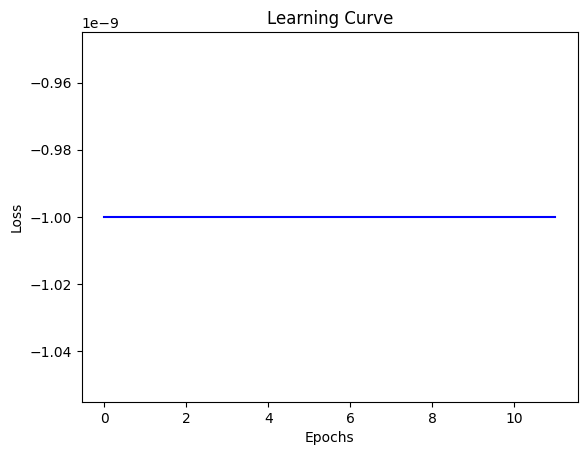

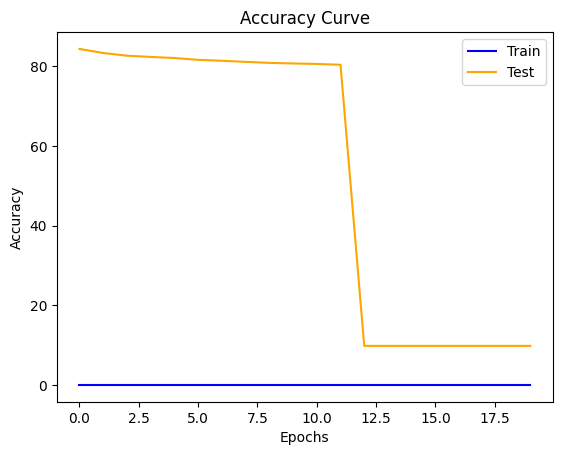

In [24]:
w0 = np.zeros((10, 784))
b0 = np.ones((10, 1))
sgd_train_acc, sgd_train_costs, sgd_w_opt, sgd_b_opt, sgd_test_acc = sgd_train(w0, b0)
plot(sgd_train_costs, sgd_train_acc, sgd_test_acc)